## Checklist
*Fill this table appropriately as you progress in your tasks:*


|**Section**|**Completion**|
|-|-|
|**Section 1**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|  Q 4 | Completed |
|  Q 5 | Completed |
|**Section 2**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|  Q 4 | Completed |
|  Q 5 | Completed |

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# Section 1 - Funnel Analysis

# 1. Data Validation and EDA
Here, I identified and handled all missing and duplicate values present in the WorkerFunnel sheet of the AssignmentData.xlsx dataset.

In [2]:
funnel = pd.read_excel('AssignmentData.xlsx', sheet_name ='WorkerFunnel')

In [3]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,NaN


In [4]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1197 non-null   object
 1   Quarter                1197 non-null   object
 2   Department             1197 non-null   object
 3   Targeted Productivity  1197 non-null   object
 4   Overtime               1197 non-null   object
 5   No. of Workers         1197 non-null   object
 6   Actual Productivity    1168 non-null   object
dtypes: object(7)
memory usage: 65.6+ KB


In [5]:
funnel['Date'] = pd.to_datetime(funnel['Date'])

In [6]:
funnel['Quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], dtype=object)

In [7]:
funnel['Quarter'] = funnel['Quarter'].astype('category')

In [8]:
funnel['Department'].unique()

array(['Sewing', 'Finishing'], dtype=object)

In [9]:
funnel['Department'] = funnel['Department'].astype('category')

In [10]:
funnel['Targeted Productivity'].unique()

array([0.8, 0.75, 0.7, 0.65, 'What do you think should be here?', 0.6,
       0.35, 0.5, 0.07, 0.4], dtype=object)

In [11]:
funnel['Targeted Productivity']= funnel['Targeted Productivity'].replace('What do you think should be here?',np.nan)

In [12]:
funnel['Targeted Productivity'] = funnel['Targeted Productivity'].astype(float)

In [13]:
funnel['Overtime'].unique()

array([7080, 960, 3660, 1920, 6720, 6900, 6000, 6480, 2160, 7200, 1440,
       6600, 5640, 1560, 6300, 6540, 13800, 6975, 7020, 6780, 4260, 6660,
       4320, 6960, 2400, 3840, 4800, 4440, 1800, 2700, 10620, 10350, 9900,
       5310, 10170, 4470, 10530, 10440, 5490, 5670, 9720, 12600, 10050,
       15120, 14640, 900, 25920, 10260, 2760, 4710, 9540, 7680, 3600,
       'Some secret message?', 6420, 7980, 3240, 8220, 6930, 8460, 7350,
       5400, 1620, 1980, 2970, 7320, 5100, 3390, 1260, 3420, 8970, 4950,
       10080, 9810, 6570, 5040, 4380, 3630, 8280, 6120, 5580, 3720, 5760,
       7470, 10500, 6360, 4140, 8400, 12180, 9000, 15000, 10770, 12000,
       9360, 3060, 2520, 720, 3780, 10320, 360, 6840, 1080, 1200, 4080,
       240, 5880, 6240, 4200, 3960, 600, 2280, 5940, 1320, 5460, 2040,
       4020, 3000, 3360, 5820, 6060, 2640, 7500, 2880, 120, 3300, 0, 3480,
       7380, 4560, 7140, 5160, 5280, 840, 5520, 480, 8160, 5700, 2820,
       5340, 1680, 7560, 1700, 4680, 3120], dtype=object

In [14]:
funnel['Overtime']= funnel['Overtime'].replace('Some secret message?',np.nan)

In [15]:
funnel['Overtime'].dtype

dtype('float64')

In [16]:
funnel['No. of Workers'].unique()

array([59, 8, 30.5, 56, 57.5, 55, 54, 18, 60, 12, 20, 17, 56.5, 54.5,
       29.5, 31.5, 31, 55.5, 58, 10, 16, 32, 58.5, 15, 5, 57, 53, 51.5, 2,
       9, 'Keep up the good work!', 7, 19, 28, 34, 89, 14, 25, 52, 4, 21,
       35, 51, 33, 11, 33.5, 22, 26, 27, 59.5, 50, 44, 49, 47, 48, 42, 24,
       45, 46, 39, 38, 6], dtype=object)

In [17]:
funnel['No. of Workers'] = funnel['No. of Workers'].replace('Keep up the good work!',np.nan)

In [18]:
funnel['Actual Productivity'].unique()

array([0.940725424, 0.8865, 0.800570492, nan, 0.800125, 0.755166667,
       0.753683478, 0.753097531, 0.750427826, 0.721126957, 0.712205247,
       0.707045902, 0.705916667, 0.676666667, 0.593055556, 0.540729167,
       0.52118, 0.988024691, 0.987880435, 0.956270833, 0.945277778,
       0.902916667, 0.800725314, 0.800322936, 0.800318644, 0.800237288,
       0.800148649, 0.787299691, 0.782447917, 0.75024303, 0.7018125,
       0.700134038, 0.699965217, 0.628333333, 0.6253125, 0.991388889,
       0.931645833, 0.915229167, 0.879714482, 0.861679012, 0.850569492,
       0.850436438, 0.850345133, 0.800598058, 0.800237838, 0.800030199,
       0.792104167, 0.759228395, 0.750348457, 0.682708333, 0.667604167,
       0.603432184, 0.345833333, 0.961059028, 0.939513889, 0.893663194,
       0.875390625, 0.820833333, 0.804416667, 0.800684366, 0.800250962,
       0.800246011, 0.800076522, 0.763375, 0.759270833, 0.7504,
       0.664583333, 0.600028736, 0.966781346, 0.936496212, 0.899166667,
       0.888

In [19]:
funnel['Actual Productivity'] = funnel['Actual Productivity'].apply(lambda x: np.nan if isinstance(x, str) else x)


In [20]:
funnel['Actual Productivity'].unique()

array([0.94072542, 0.8865    , 0.80057049,        nan, 0.800125  ,
       0.75516667, 0.75368348, 0.75309753, 0.75042783, 0.72112696,
       0.71220525, 0.7070459 , 0.70591667, 0.67666667, 0.59305556,
       0.54072917, 0.52118   , 0.98802469, 0.98788044, 0.95627083,
       0.94527778, 0.90291667, 0.80072531, 0.80032294, 0.80031864,
       0.80023729, 0.80014865, 0.78729969, 0.78244792, 0.75024303,
       0.7018125 , 0.70013404, 0.69996522, 0.62833333, 0.6253125 ,
       0.99138889, 0.93164583, 0.91522917, 0.87971448, 0.86167901,
       0.85056949, 0.85043644, 0.85034513, 0.80059806, 0.80023784,
       0.8000302 , 0.79210417, 0.75922839, 0.75034846, 0.68270833,
       0.66760417, 0.60343218, 0.34583333, 0.96105903, 0.93951389,
       0.89366319, 0.87539062, 0.82083333, 0.80441667, 0.80068437,
       0.80025096, 0.80024601, 0.80007652, 0.763375  , 0.75927083,
       0.7504    , 0.66458333, 0.60002874, 0.96678135, 0.93649621,
       0.89916667, 0.88868687, 0.85050231, 0.80964015, 0.80590

In [21]:
funnel['Actual Productivity'] = funnel['Actual Productivity'].astype(float)

In [22]:
funnel.isna().sum()

Date                      0
Quarter                   0
Department                0
Targeted Productivity     1
Overtime                  1
No. of Workers            1
Actual Productivity      30
dtype: int64

We see that, after formatting our datasets, we have 30 missing values in our 'Actual Productivity' column, and a single missing value in the 'Targetted Productivity','Overtime' and 'No. of Workers' columns. 

Before filling in the missing values, I went forth to explore the data.

In [23]:
funnel.describe()

,Date,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1197,1196.000000,1196.000000,1196.000000,1167.000000
mean,2015-04-15 21:20:00,0.729574,4562.474916,34.632943,0.734882
min,2015-01-01 00:00:00,0.070000,0.000000,2.000000,0.233705
25%,2015-01-27 00:00:00,0.700000,1440.000000,9.000000,0.650272
50%,2015-02-25 00:00:00,0.750000,3960.000000,34.000000,0.773333
75%,2015-07-02 00:00:00,0.800000,6937.500000,57.000000,0.850176
max,2015-12-02 00:00:00,0.800000,25920.000000,89.000000,1.120437
std,NaN,0.097911,3345.777708,22.192593,0.174629


In [24]:
# Checking for duplicate values
funnel.duplicated().values.any()

True

In [25]:
# Dropping duplicate values
funnel.drop_duplicates(inplace=True)

**Exploratory Data Analysis(EDA)**

<Axes: xlabel='Quarter', ylabel='count'>

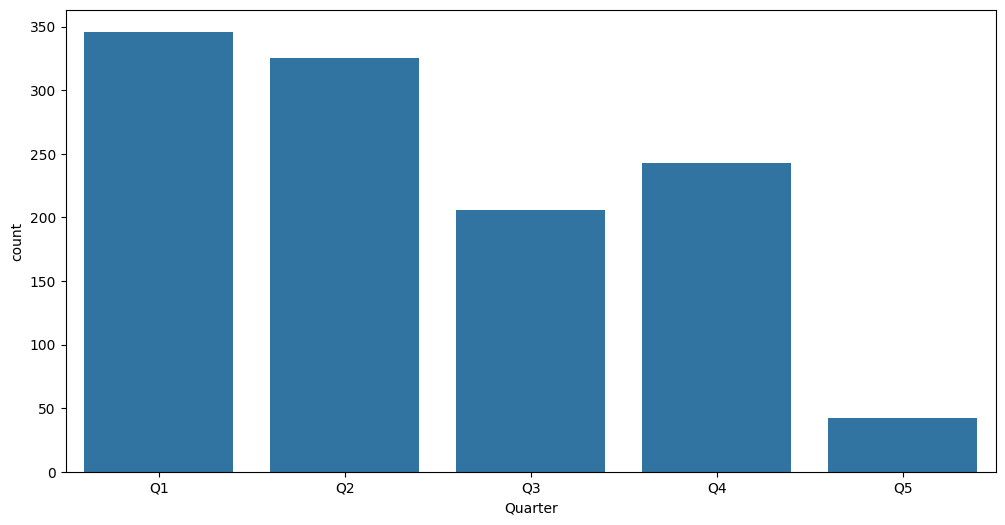

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data = funnel, x = 'Quarter')

<Axes: xlabel='Department', ylabel='count'>

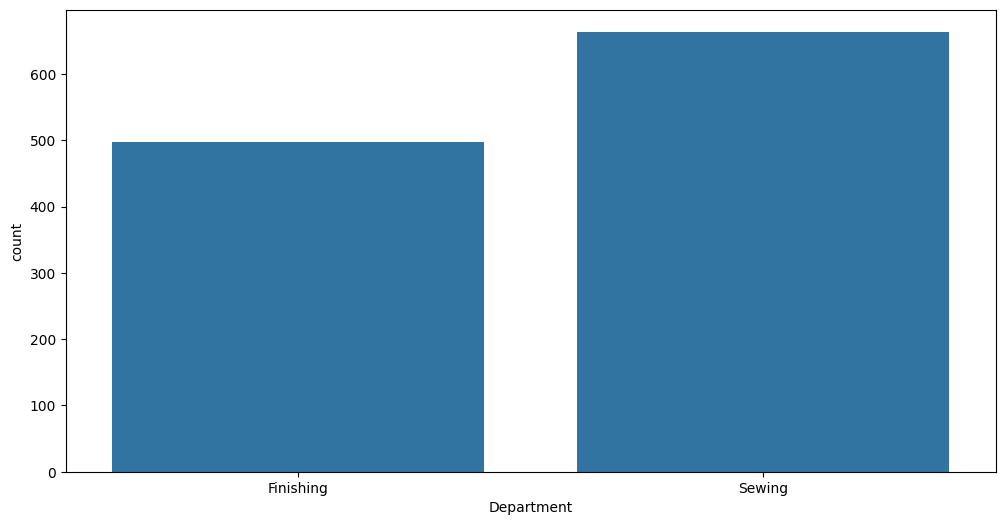

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data = funnel, x = 'Department')

<Figure size 1200x600 with 0 Axes>

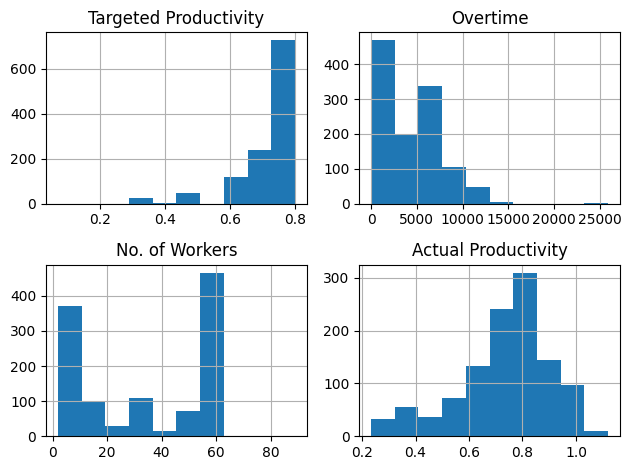

In [28]:
plt.figure(figsize=(12,6))
funnel[['Targeted Productivity','Overtime','No. of Workers','Actual Productivity']].hist()
plt.tight_layout()

We see that our our numerical features are skewed.

<Axes: xlabel='Actual Productivity', ylabel='Density'>

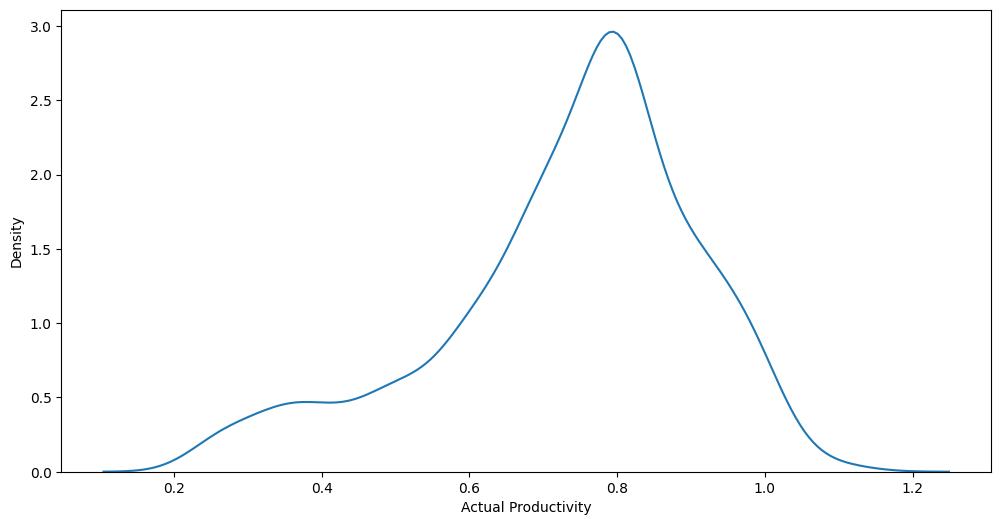

In [29]:
plt.figure(figsize=(12,6))
sns.kdeplot(data = funnel,x = 'Actual Productivity')

In [30]:
# Calculate means and medians
department_stats = funnel.groupby('Department')['Actual Productivity'].agg(['mean', 'median'])
quarter_stats = funnel.groupby('Quarter')['Actual Productivity'].agg(['mean', 'median'])

print("Department Statistics:")
print(department_stats)

print("\nQuarter Statistics:")
print(quarter_stats)

Department Statistics:
                mean    median
Department                    
Finishing   0.751779  0.805653
Sewing      0.718777  0.750474

Quarter Statistics:
             mean    median
Quarter                    
Q1       0.750981  0.799963
Q2       0.741753  0.800000
Q3       0.704161  0.722333
Q4       0.705814  0.750333
Q5       0.815517  0.864583


* Our 'Actual Productivity' columns forinstance, is skewed to the left. 
* Furthermore, according to the dataset description, the 'Actual Productivity' column ranges from 0-1 but we have a value of 1.2 as well.
* Furthermore, based on the statistics for Actual Productivity by Department and Quarter, the Department Statistics shows a more pronounced difference between the two departments compared to the variability seen across the quarters.
* So I went forth to fill the missing values of the 'Actual Productivity' column by the median of the 'Deparment' column.

In [31]:
# Fill missing values based on Department median
funnel['Actual Productivity'] = funnel.groupby('Department')['Actual Productivity'].transform(lambda x: x.fillna(x.median()))

<Axes: >

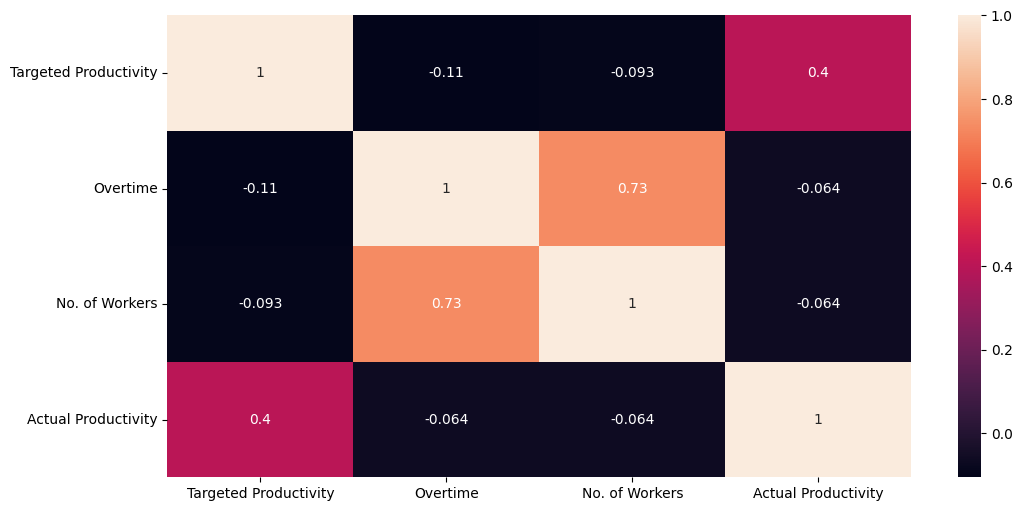

In [32]:
plt.figure(figsize=(12,6))
corr_matrix = funnel[['Targeted Productivity','Overtime','No. of Workers','Actual Productivity']].corr()
sns.heatmap(corr_matrix, annot = True)

Looking at the heatmap, there is a strong positive correlation of 0.73 between 'Number of Workers' and 'Overtime'. This means that, as the number of workers increases, overtime tends to increase as well as seen in the scatterplot below.

<Axes: xlabel='No. of Workers', ylabel='Overtime'>

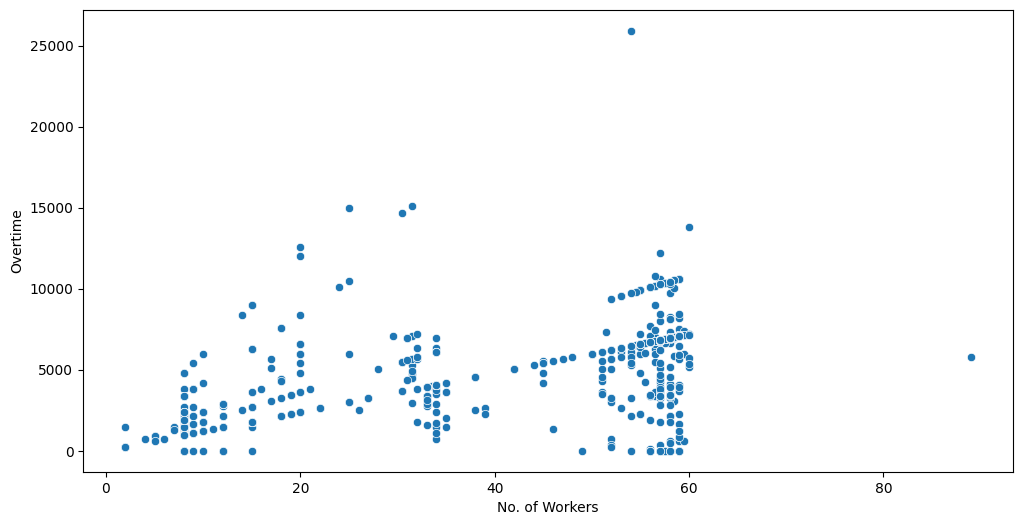

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = funnel, x = 'No. of Workers',y = 'Overtime')

<Axes: xlabel='Overtime', ylabel='Density'>

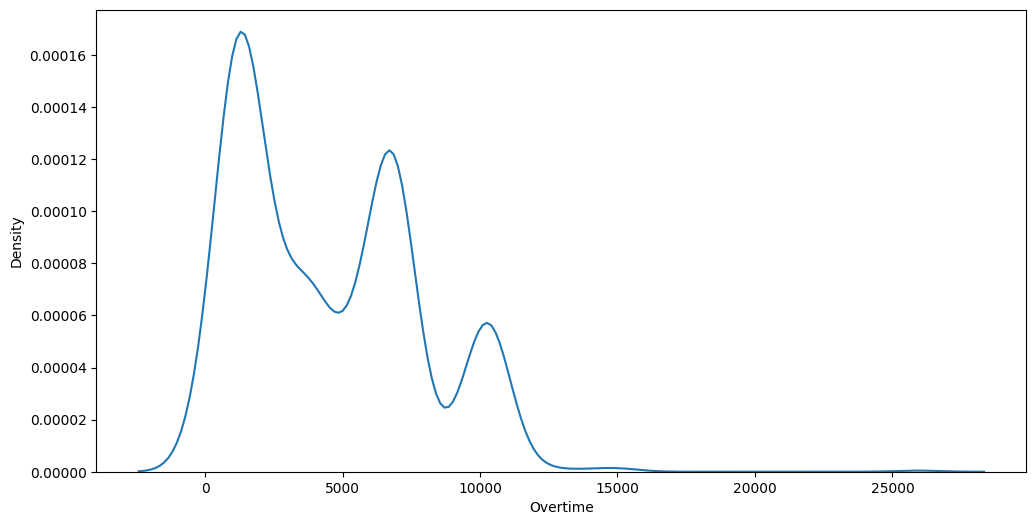

In [34]:
# KDE Distribution of Overtime
plt.figure(figsize=(12,6))
sns.kdeplot(data = funnel,x = 'Overtime')

We see that the distribution is skewed to the right with a peak at lower values and a long tail extending towards higher overtime hours. 

<Axes: xlabel='No. of Workers', ylabel='Density'>

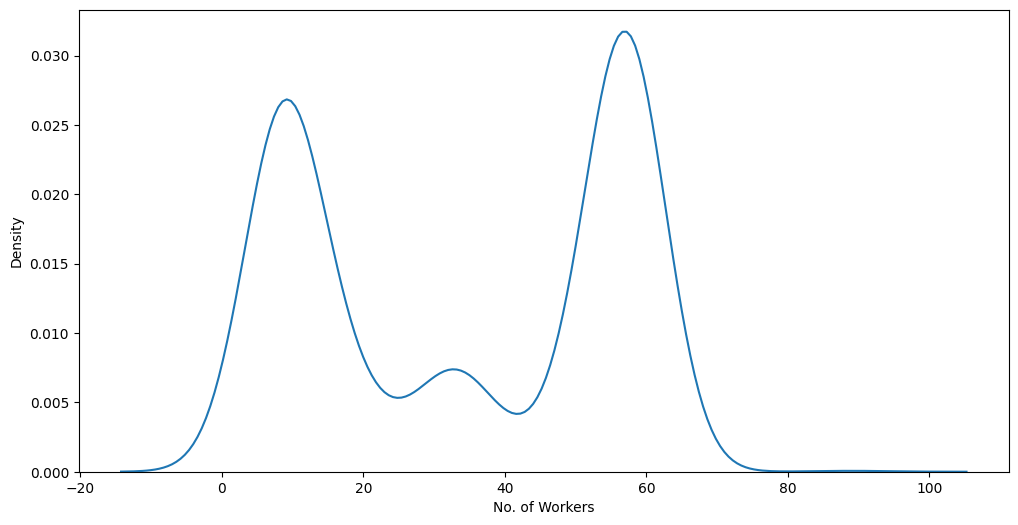

In [35]:
# KDE distribution of the Number of Workers
plt.figure(figsize=(12,6))
sns.kdeplot(data = funnel,x = 'No. of Workers')

The distribution of the Number of workers appears to be bimodel with two peaks. This suggests there are likely two different groups within the data, possibly indicating different working conditions or shifts.

In [36]:
# Filling Overtime missing value with the median
funnel['Overtime'] = funnel['Overtime'].fillna(funnel['Overtime'].median())

In [37]:
# Filling  missing Number of Workers with median
funnel['No. of Workers'] = funnel['No. of Workers'].fillna(funnel['No. of Workers'].median())

<Axes: xlabel='Targeted Productivity', ylabel='Density'>

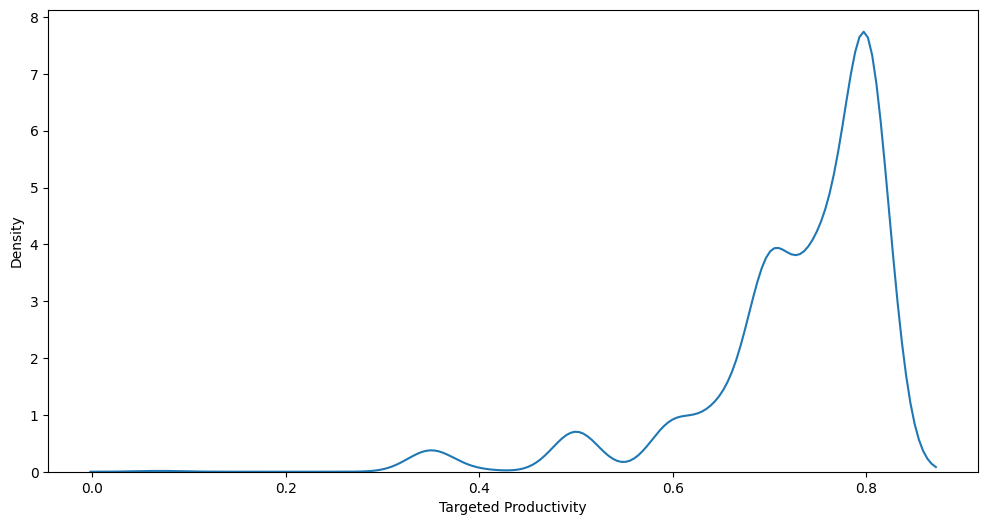

In [38]:
# KDE Distribution of the Targeted Productivity
plt.figure(figsize=(12,6))
sns.kdeplot(data = funnel, x = 'Targeted Productivity')

Our Targeted Productivity column is skewed to the left.

In [39]:
funnel['Targeted Productivity'] = funnel['Targeted Productivity'].fillna(funnel['Targeted Productivity'].median())

In [40]:
funnel.isna().sum()

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

**Partial Conclusion:**

Our dataset is now clean and free of all missing and duplicate values.

# 2. Principal Component Analysis

**(i). Performing PCA**

Given the following features:`Targeted Productivity`, `Overtime`, `No. of Workers`, and `Actual Productivity`, has already been standardized, I now proceed to perform PCA.

In [41]:
funnel.columns

Index(['Date', 'Quarter', 'Department', 'Targeted Productivity', 'Overtime',
       'No. of Workers', 'Actual Productivity'],
      dtype='object')

In [42]:
Z = funnel[['Targeted Productivity', 'Overtime','No. of Workers', 'Actual Productivity']]

In [43]:
# Checking for covariance
c = Z.cov()

<Axes: >

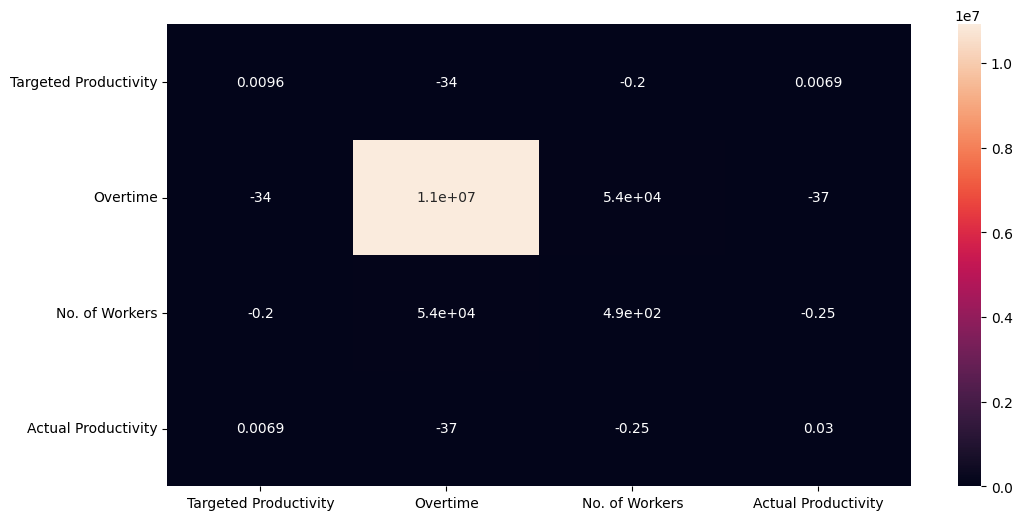

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(c, annot= True)

In [45]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.09149009e+07 2.27211337e+02 7.48454642e-03 3.18733141e-02]
Eigen values Shape: (4,)
Eigen Vector Shape: (4, 4)


In [46]:
# Indexing and sorting the eigenvalues in descending order 
index = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[index]
eigenvectors = eigenvectors[:,index]

I now went forth to look at the explained variance which is simply the term that gives us an idea of the amount of the data which has been retained by selecting the principal components of the original feature space.

In [47]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)

In [48]:
explained_var

array([0.99997918, 1.        , 1.        , 1.        ])

**(ii). Number of Principal Components**

* Here, I went forth to determine the number of principal components that explain atleast 90% of the variance in the data
* The np.argmax function returns the index of the first occurence of the maximum value in the input array.
* Since Python uses zero-based indexing, adding 1 to the index returned by the np.armax gives the number of components needed reach atleast 90% of the variance.


In [49]:
# Argmax() takes the index of the maximum element
n_components = np.argmax(explained_var >= 0.90) +1 

In [50]:
n_components

1

An output of 1 here indicates that only 1 component is needed to explain atleast 90% of the variance, which suggests that the majority of the variance in our dataset can be captured by just the first principal component (PC1).

**(iii). Visualization ot the Explained Variance by Each Principal Component**

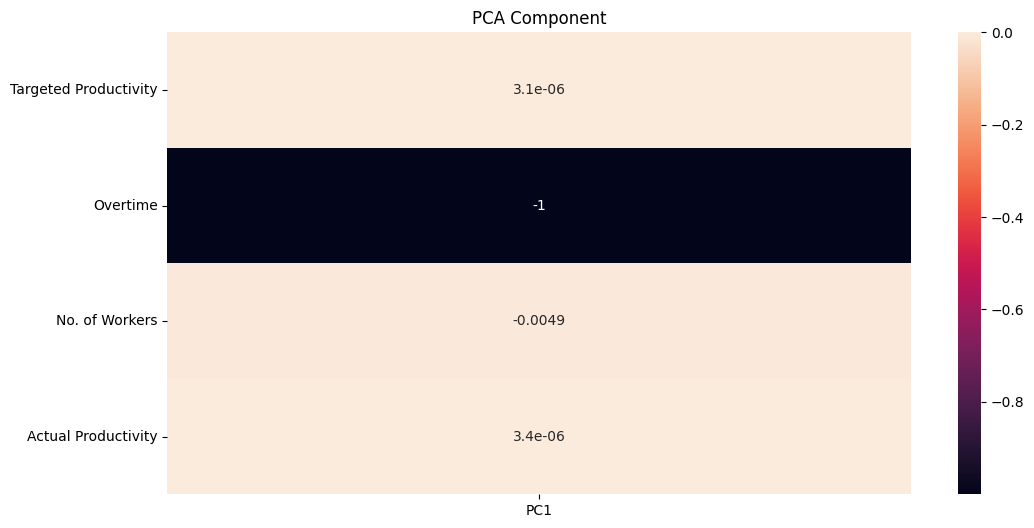

In [51]:
# PCA component or unit matrix
unit_matrix = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(unit_matrix,index = Z.columns,columns = ['PC1'])
plt.figure(figsize =(12, 6))
sns.heatmap(pca_component, annot = True)
plt.title('PCA Component')
plt.show()


**(iv). PCA Results and Interpretation**

**Interpretation of PCA Results**


1. **PCA Loadings Overview**:
* Targeted Productivity: A positive loading of (3.1e-06) indicates that increases in targeted productivity are associated with increases in the overall productivity represented by PC1.
* Overtime:  A strong negative loading of (-1) suggests that higher overtime correlates with lower productivity in this context. This could imply that excessive overtime may reflect inefficiencies or burnout.
* Number of Workers: A slight negative loading of (-0.0049) indicates that increasing the workforce may not significantly contribute to productivity, suggesting potential inefficiencies in resource allocation.
* Actual Productivity: Positive loading (3.4e-06) implies that higher actual productivity is associated with increased productivity as captured by PC1.

**2. Understanding Productivity Dynamics**

* **Overtime** emerges as a critical factor. The strong negative loading suggests that while employees may work longer hours, this does not translate into higher productivity. This insight can prompt management to reconsider overtime policies and explore better work-life balance strategies.

* **Resource Management:** The negative loading for the **Number of Workers** indicates that simply increasing staff may not lead to improved productivity. This highlights the importance of optimizing workforce size and ensuring that employee roles and responsibilities are aligned with productivity goals.

* **Aligning Targets:** The positive correlation of **Targeted** and **Actual Productivity** with PC1 emphasizes the need for realistic goal-setting. Discrepancies between targeted and actual productivity can signal areas for improvement in planning and execution.

* **Strategic Adjustments** Understanding these dynamics allows for strategic adjustments in operations. If overtime is negatively impacting productivity, the organization might explore alternative approaches such as hiring additional staff or improving efficiency through training and process optimization.

* **Monitoring Trends:**Regular analysis of these principal components can help track changes and trends in productivity over time, allowing the organization to adapt its strategies proactively.

**Partial Conclusion**

The PCA results obtained, provide valuable insights into the productivity dynamics of the organization. The negative impact of overtime on productivity, in particular, suggests a need for a reevaluation of current work practices to ensure sustainable productivity growth.

## 3. Predictive Modeling and Time Series Analysis

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [53]:
quarter = funnel.copy()

In [54]:
quarter.set_index('Date', inplace=True)

In [55]:
numeric_columns = quarter.select_dtypes(include = ['float64'])
quarter_resampled = numeric_columns.resample('Q').mean()

c:\Users\hottec\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE: 0.019307561097696265, MSE: 0.0003536041948608627


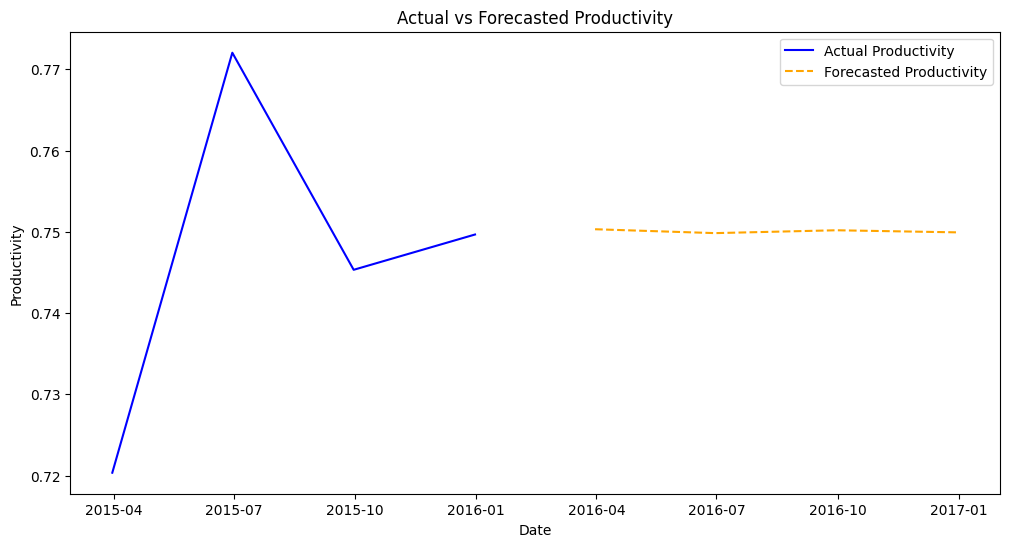

In [56]:
# Assume quarter_resampled is already created
actual_productivity = quarter_resampled['Actual Productivity']

# Fit the ARIMA model
model = ARIMA(actual_productivity, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next four quarters
forecast = model_fit.forecast(steps=4)
forecast_index = pd.date_range(start=actual_productivity.index[-1] + pd.offsets.QuarterEnd(), periods=4, freq='Q')
forecast_series = pd.Series(forecast, index=forecast_index)

# Get last four quarters for evaluation
actual_values = actual_productivity[-4:].values  # Last 4 actual values

# Evaluate the model
mape = mean_absolute_percentage_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)

print(f'MAPE: {mape}, MSE: {mse}')

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(actual_productivity.index, actual_productivity, label='Actual Productivity', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Productivity', color='orange', linestyle='--')
plt.title('Actual vs Forecasted Productivity')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()

## 4. Clustering Analysis

**(i). Performing K-Means clustering on the Actual Productivity, Overtime, and No. of Workers**

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [58]:
pca_features = funnel[['Actual Productivity', 'Overtime','No. of Workers']].copy()

In [59]:
scaler = StandardScaler()
scaled_features =  scaler.fit_transform(pca_features)

**(ii). Determine the Optimal Number of Clsuters**

Text(0.5, 0, 'Number of Clusters')

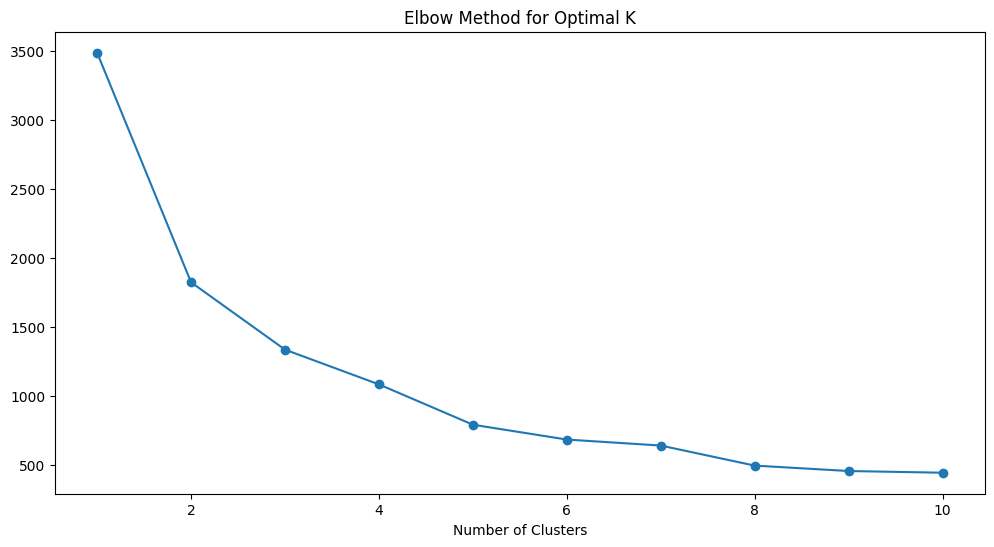

In [60]:
inertia = []
cluster_range = range(1,11) 
for k in cluster_range:
    kmeans = KMeans(n_clusters= k, random_state=101)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (12,6))
plt.plot(cluster_range, inertia, marker = 'o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')

The elbow point is where the rate of decrease in inertia sharply changes.
Here I chose my value of k = 3

In [61]:
# Fitting K-Means with the optimal number of clusters, k = 3
kmeans = KMeans(n_clusters = 3, random_state=42)
pca_features['Cluster'] = kmeans.fit_predict(scaled_features)

**(iii). Visualizing Clusters and Interpretation**

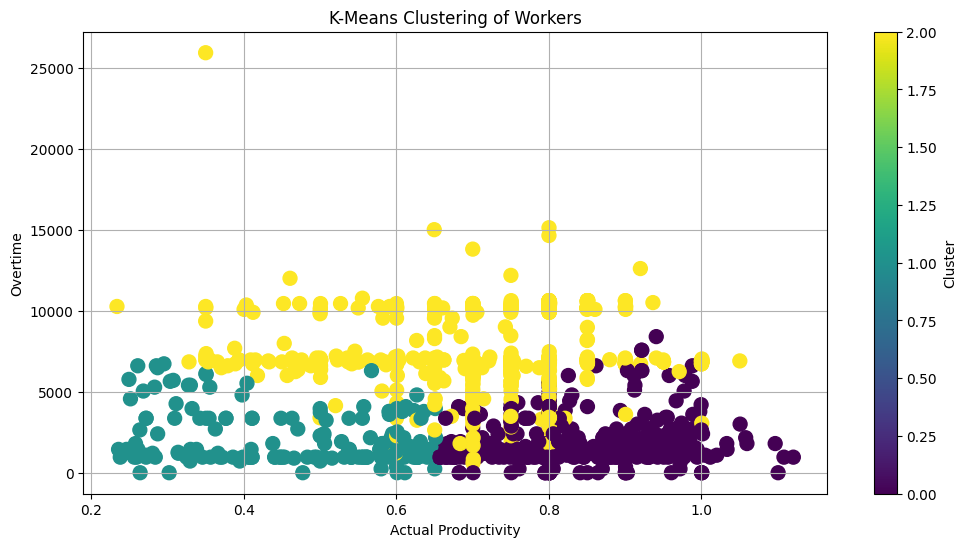

In [62]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(pca_features['Actual Productivity'], pca_features['Overtime'], c=pca_features['Cluster'], s=100)
plt.title('K-Means Clustering of Workers')
plt.xlabel('Actual Productivity')
plt.ylabel('Overtime')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

**Interpretation of Clusters and Their Contribution to Overall Productivity**

1. **Purple Cluster**: 
* Workers in this cluster have moderate to high productivity (0.7 to 1.0) and low overtime (0 to 5,000 hours).
* **Contribution**: They contribute significantly to overall productivity by completing tasks efficiently within standard work hours. Their effectiveness suggests strong time management and work-life balance.

2. **Yellow Cluster**:
* This cluster displays moderate productivity from around (0.4 to 0.8) and a wide range of overtime (5,000 to 25,000 hours).
* **Contribution**: While this group contributes positively to productivity, the high overtime indicates potential inefficiencies or struggles with workload management. They may be at risk of burnout, which could affect long-term productivity.

3. **Teal Cluster**:
* Workers here exhibit lower productivity (0.2 to 0.6) and low overtime (0 to 5,000 hours).
* **Contribution**: This cluster contributes the least to overall productivity. Their low output suggests disengagement or challenges that hinder performance, indicating a need for targeted support.

**Summary**

Each cluster represents a different segment of workers with unique contributions to overall productivity, highlighting the importance of tailored management strategies to enhance performance across the workforce.

## 5. Budget Allocation Strategy

**(i). Analyze the Value Brought by Each Department**

In order to analyse the Value brought by each department, the following approach could be done;

 * Given that the organization spends Rs. 8.4 lakh (or Rs. 840,000) per quarter, we need to allocate this budget across departments based on the number of workers in each department. 

* We then proceed to calculate the Department Value.
* **Formula**: 

    Department Value = Actual Productivity / Department Quarterly Spend

* **The Department Quarterly Spend** can be calculated as thus:

  Department Quarterly Spend = (Total Spend / Total Number of Workers) * (Number of Workers in Department)



In [63]:
department_df = funnel.copy()

total_workers = department_df['No. of Workers'].sum()

# Spend per worker calculation
spend_per_worker = 840000 / total_workers

# Calculation of the Department Quarterly Spend 
department_df['Department Quarterly Spend'] = department_df['No. of Workers'] * spend_per_worker

# Calculating the Department Value
department_df['Department Value'] = department_df['Actual Productivity'] / department_df['Department Quarterly Spend']

# Grouping by Department to get summarized values
department_summary = department_df.groupby('Department').agg({'Actual Productivity': 'sum','Department Quarterly Spend': 'sum','Department Value': 'mean'}).reset_index()

print(department_summary)

  Department  Actual Productivity  Department Quarterly Spend  \
0  Finishing           374.924772               107940.483944   
1     Sewing           477.902084               732059.516056   

   Department Value  
0          0.003894  
1          0.000684  


**Department Summary**
 * **Finishing Department :** For every rupee spent, the Finishing Department generates about 0.0039 units of productivity.

* **Sewing Department :** For every rupee spent, the Sewing Department generates about 0.000684 units of productivity.

**Analysis**

* The **Finishing Department** has a higher department value compared to the **Sewing Department**. This means it provides more productivity per rupee spent.
* The **Sewing Department**, despite having a higher actual productivity, has a much lower department value, indicating that it is less efficient in terms of spending.

**Recommendations for Revised Budget Allocation**

**Increase Budget for Finishing**:
* Since the Finishing Department provides better value, we can consider allocating more budget to this department to further enhance its productivity.

**Review Budget for Sewing**:
* The Sewing Department’s low department value suggests it may not be using its budget effectively. We can consider reviewing its operations to identify inefficiencies.
* Also, we might consider reducing its budget or require it to improve productivity before receiving additional funds.

**Conclusion**

By reallocating the budget based on these insights, the organization can maximize overall productivity and ensure that funds are being spent effectively across departments.

# Section 2 - Anomaly Detection

**1. Data Import and Exploration**

The file was converted to csv format, to reduce computation time.

In [64]:
transactions = pd.read_csv('creditcard.csv')

In [65]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239598554,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928075,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078802983,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846476,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791460956,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689280956,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.23760894,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575332,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592940745,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141266984,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  object 
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  object 
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  object 
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

From the information gotten from our dataset, we see that we do not have missing values. Also, by exploring some of our columns that are objects, we can find some valuable insights.However,let's go ahead to confirm the fact there are no missing values.

In [67]:
# Checking for Missing Values
transactions.isna().values.any()

False

In [68]:
# object_columns = transactions.select_dtypes(include = ['object']).columns

# for column in object_columns:
#     unique_values = transactions[column].unique()  
#     string_values = [value for value in unique_values if isinstance(value, str)]
#     print("Unique string values in column '{}':".format(column))
#     for value in string_values:
#         print(value)

We noticed that, the columns V2, V7,V9 and V24 do have some string values. So I went ahead to replace these string values and filled the misisng values with the mean.

In [69]:
transactions['V2'] = transactions['V2'].replace("I think you're doing good!", np.nan)
transactions['V2'] = transactions['V2'].astype('float64')

transactions['V7'] = transactions['V7'].replace("Hey you found me!", np.nan)
transactions['V7'] = transactions['V7'].replace("If you're good, you'll find me!", np.nan)
transactions['V7'] = transactions['V7'].astype('float64')

transactions['V9'] = transactions['V9'].replace("This is fun!", np.nan)
transactions['V9'] = transactions['V9'].astype('float64')

transactions['V24'] = transactions['V24'].replace("Nah I am caught I guess", np.nan)
transactions['V24'] = transactions['V24'].astype('float64')

In [70]:
transactions['V2'] = transactions['V2'].fillna(transactions['V2'].mean())
transactions['V7'] = transactions['V7'].fillna(transactions['V7'].mean())
transactions['V9'] = transactions['V9'].fillna(transactions['V9'].mean())
transactions['V24'] = transactions['V24'].fillna(transactions['V24'].mean())

In [71]:
# Checking for duplicate Values
transactions.duplicated().values.any()

True

Hence, we do have duplicated values. So I went ahead to drop them

In [72]:
# Dropping duplicates
transactions.drop_duplicates(inplace = True)

In [73]:
transactions.shape

(283726, 31)

In [74]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  int64  
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

After dropping duplicate values, we end up with  283726 rows compared to our previous 284,807 rows.

In [75]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004144,0.001613,-0.002966,0.001828,-0.001139,0.001805,-0.000854,-0.001597,...,-0.000371,-0.000015,0.000198,0.000212,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646695,1.508682,1.414184,1.377008,1.331931,1.227662,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605626,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552490,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063942,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041014,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800280,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439710,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


*Interpretation of Summary Statistics*
*Transaction Time* 
* The average time of transactions is around 94,811 seconds (approximately 26.3 hours), indicating a wide time range.
* The minimum time is 0, and the maximum is 172,792 seconds (about 48 hours), which suggests that the transactions span over two days.

*Vn Features where n = 1 - 28*
* Most V features have small means (close to 0), suggesting they are standardized values

*Amount*
* The average transaction amount is approximately 88.47, but there is a large standard deviation (250.40), indicating that while many transactions are small, some are significantly larger.
* The transaction amounts range from 0 to 25,691.16, highlighting the presence of outliers.

*Class*
* The mean of the Class column is 0.001667, indicating that about 0.17% of the transactions are fraudulent (1), which is a typical imbalance in fraud detection datasets.

**Partial Conclusion**

The dataset has been validated, clean and void of duplicate values. I now went forth to perform exploaratory data analysis inorder to bette understand the data.

**EDA**

Text(0, 0.5, 'Count')

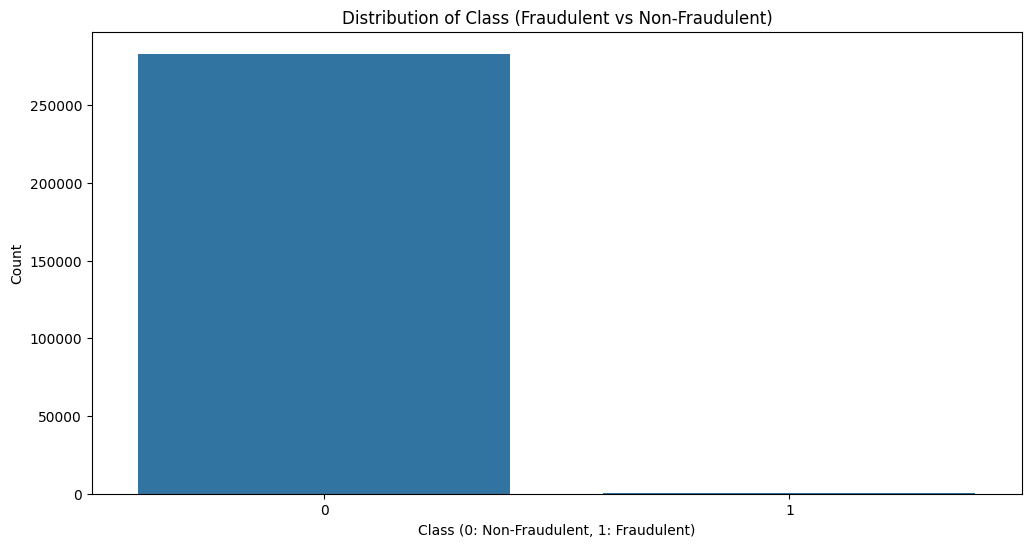

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Class', data=transactions)
plt.title('Distribution of Class (Fraudulent vs Non-Fraudulent)')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')

We see that, we have far less fraudulent transactions in our datastet compared to non-fraudulent transactions implying an imbalance.

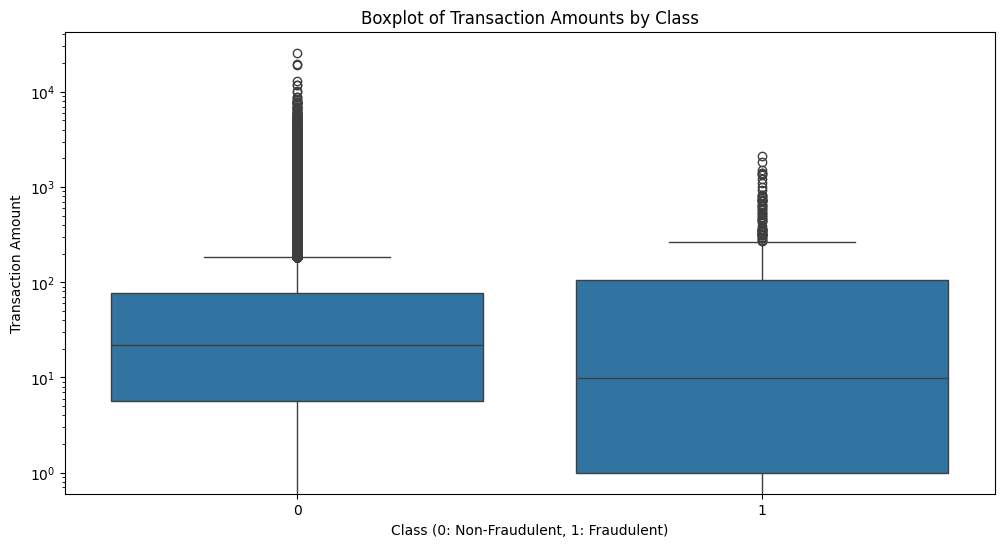

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=transactions)
plt.title('Boxplot of Transaction Amounts by Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Using log scale since there are large outliers

We see the presence of outliers in our boxplot of Transaction amount by class.

Text(0.5, 1.0, 'Correlation of Features with Class')

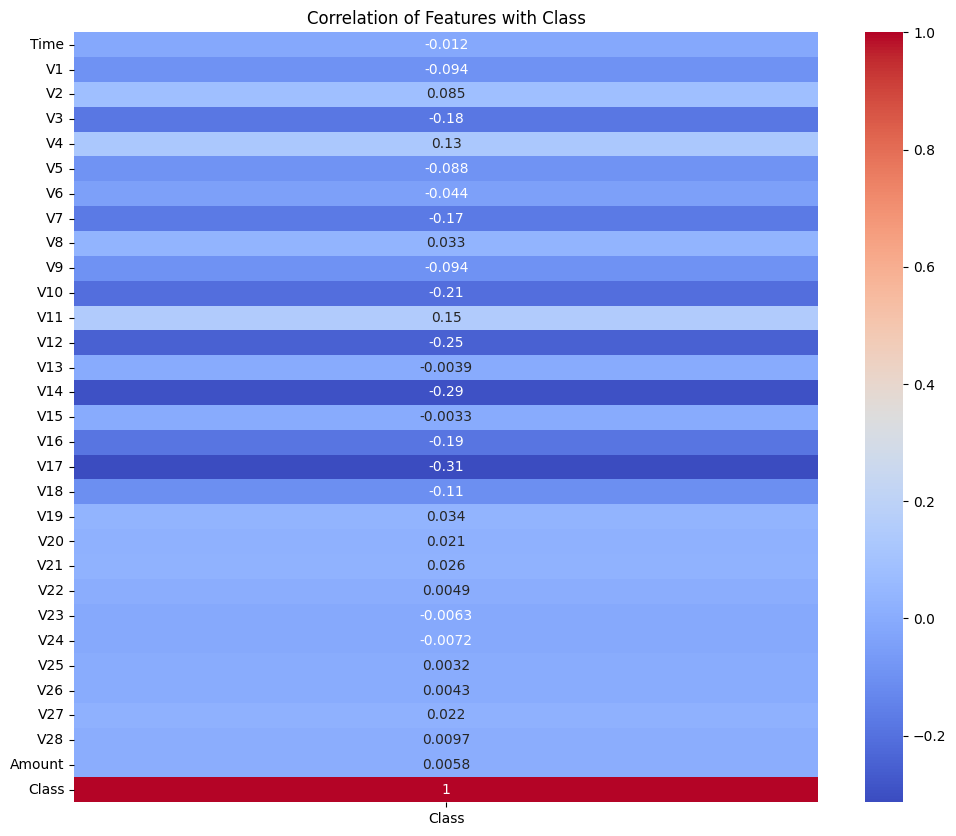

In [78]:
#  Checking the correlation of features with  Class

correlation_matrix = transactions.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Class']], annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Class')

Realise that the different features have relatively weak correlation coefficient with Class with the highest negative correlation being V17 (-0.31), which means as the values in V17 increases, the likelihood of a transaction being fraudulent decreases. Howver the relatively small values of the correlation coefficients of the different features, just goes further to imply that, there exist a very weak relationship of the different features with Class.

**Min-Max Scaling** rescales the features to a fixed range, usually [0,1] and is sensitive to outliers, which can distort the scale of the other values.

**Standardization** on the other hand,scales the features to have a mean of 0 and a standardization of 1 and is less sensitve to outliers.

We earlier saw the presence of outliers in our boxplot, hence, I went forth to use **Standardization** due to its' robustness to outliers.

In [79]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
transactions[['Time','Amount']] = scaler.fit_transform(transactions[['Time','Amount']])

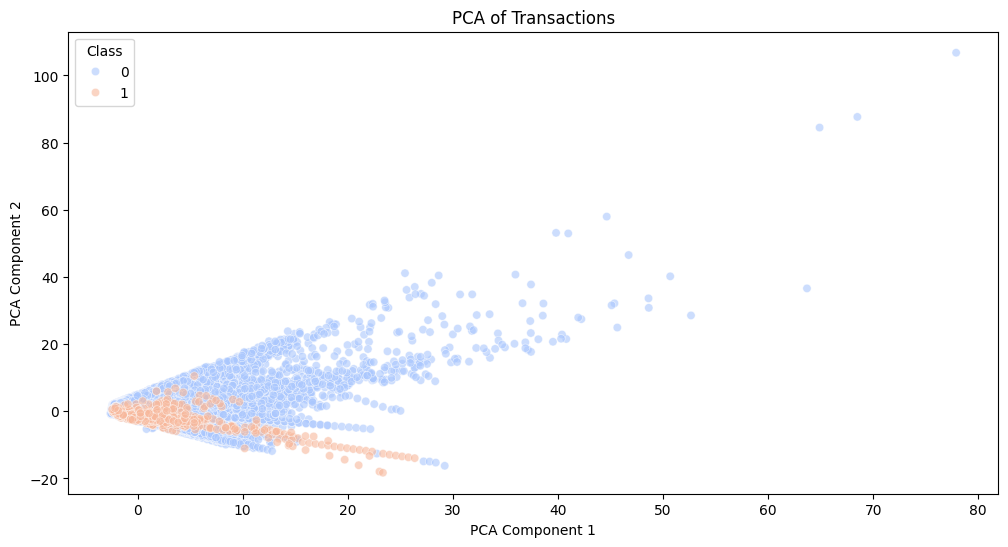

In [80]:
# Select features for PCA (standardized Time and Amount included)
pca_features = transactions[['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]]

# Initialize PCA
pca = PCA(n_components=2)

# Fitting and transforming the data
pca_result = pca.fit_transform(pca_features)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Adding Class column for visualization
pca_df['Class'] = transactions['Class'].values

# Visualize PCA results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=pca_df, palette='coolwarm', alpha=0.6)
plt.title('PCA of Transactions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Class')

* The plot shows two distinct clusters: one representing normal transactions (Class 0) and another representing fraudulent transactions (Class 1).
* Most fraudulent transactions (Class 1) appear to be clustered towards the lower left region of the plot, indicating that they may share certain characteristics that differentiate them from normal transactions.
* The majority of normal transactions (Class 0) are concentrated in the upper regions of the plot, particularly in the area with higher values for PCA Component 1.
* This suggests that normal transactions have different underlying patterns compared to fraudulent ones.

**3. Anomaly Detection Model**

In [81]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

**Isolation Forest**

In [82]:
# Initialize Isolation Forest
isolation_forest = IsolationForest(contamination=0.001, random_state=101)

# Fit the model
transactions['Anomaly_IF'] = isolation_forest.fit_predict(pca_features)

# Convert -1 (anomaly) and 1 (normal) to 1 (anomaly) and 0 (normal)
transactions['Anomaly_IF'] = np.where(transactions['Anomaly_IF'] == -1, 1, 0)

**Local Outlier Factor**

In [83]:
# Initialize LOF
lof = LocalOutlierFactor(n_neighbors=40, contamination=0.001)

# Fit the model and predict
transactions['Anomaly_LOF'] = lof.fit_predict(pca_features)

# Convert -1 (anomaly) and 1 (normal) to 1 (anomaly) and 0 (normal)
transactions['Anomaly_LOF'] = np.where(transactions['Anomaly_LOF'] == -1, 1, 0)

**Evaluating Model Performance**

In [84]:
y_true = transactions['Class']  # Actual class labels

In [85]:
# Performance metrics for Isolation Forest
print("Isolation Forest Evaluation:")
print(classification_report(y_true, transactions['Anomaly_IF']))

# ROC AUC
roc_auc_if = roc_auc_score(y_true, transactions['Anomaly_IF'])
print(f"ROC AUC: {roc_auc_if:.4f}")

Isolation Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.24      0.15      0.18       473

    accuracy                           1.00    283726
   macro avg       0.62      0.57      0.59    283726
weighted avg       1.00      1.00      1.00    283726

ROC AUC: 0.5726


In [86]:
# Performance metrics for LOF
print("Local Outlier Factor Evaluation:")
print(classification_report(y_true, transactions['Anomaly_LOF']))

# ROC AUC
roc_auc_lof = roc_auc_score(y_true, transactions['Anomaly_LOF'])
print(f"ROC AUC: {roc_auc_lof:.4f}")

Local Outlier Factor Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.00      0.00      0.00       473

    accuracy                           1.00    283726
   macro avg       0.50      0.50      0.50    283726
weighted avg       1.00      1.00      1.00    283726

ROC AUC: 0.4995


**Partial Conclusion**

Notice that the Isolation Forest Algorithm performs better than  Local Outlier Factor. Looking at the performance metrics for the Isolation Forest algorithm, the following conclusions could be drawn;

* Imbalance Issue: The model performs exceptionally well on the majority class (0) but poorly on the minority class (1). This indicates a potential issue with class imbalance in your dataset as we saw earlier.
* Furthermore, the low recall and precision for the minority class suggest that the model struggles to identify instances of class 1 effectively. This could lead to missing important anomalies, depending on the context.

**4. Visualizing Anomalies**

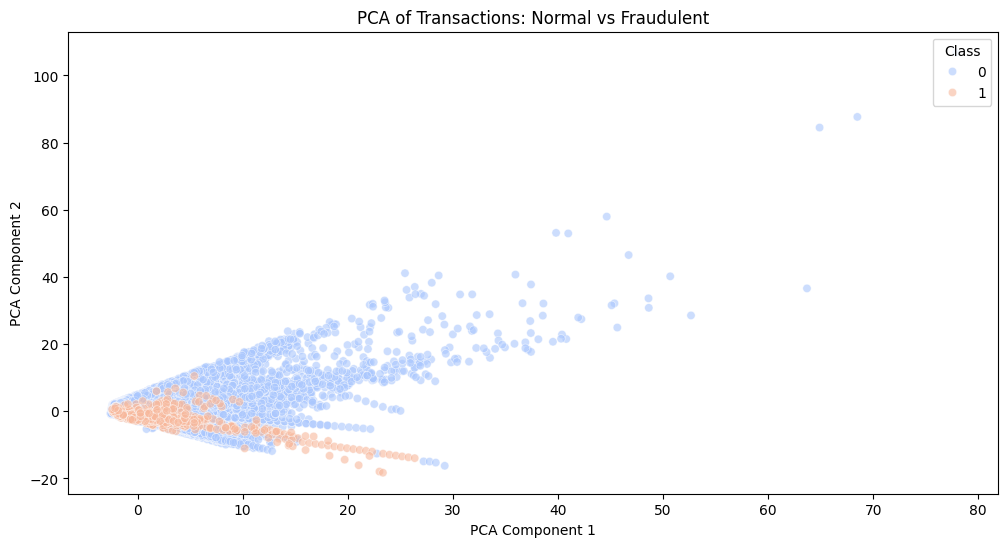

In [87]:
# Scatter plot Using PCA Transformed Features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=pca_df, palette='coolwarm', alpha=0.6)
plt.title('PCA of Transactions: Normal vs Fraudulent')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Class', loc='upper right')

Before creating a fraudulent transaction detection function, the creditcard_test data was analysed,

In [88]:
creditcardtest = pd.read_csv('creditcard_test.csv')

In [89]:
creditcardtest.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,612,0.496714,-0.138264,0.647688538,1.523030,-0.234153,-0.234137,1.579213,0.767434729,-0.469474,...,-1.412304,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,87.060408
1,1396,-0.600639,-0.291694,-0.601706612,1.852278,-0.013497,-1.057711,0.822545,-1.22084365,0.208864,...,1.057122,0.343618,-1.763040,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280,91.745572
2,2137,-0.839218,-0.309212,0.331263431,0.975545,-0.479174,-0.185659,-1.106335,-1.196206624,0.812526,...,0.821903,0.087047,-0.299007,0.091761,-1.987569,-0.219672,0.357113,1.477894,-0.518270,49.184828
3,3084,-0.808494,-0.501757,0.915402118,0.328751,-0.529760,0.513267,0.097078,0.968644991,-0.702053,...,-0.802277,-0.161286,0.404051,1.886186,0.174578,0.257550,-0.074446,-1.918771,-0.026514,10.146445
4,3970,0.060230,2.463242,-0.192360965,0.301547,-0.034712,-1.168678,1.142823,0.751933033,0.791032,...,0.068563,-1.062304,0.473592,-0.919424,1.549934,-0.783253,-0.322062,0.813517,-1.230864,45.353316


In [90]:
creditcardtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1000 non-null   int64  
 1   V1      1000 non-null   float64
 2   V2      1000 non-null   float64
 3   V3      1000 non-null   object 
 4   V4      1000 non-null   float64
 5   V5      1000 non-null   float64
 6   V6      1000 non-null   float64
 7   V7      1000 non-null   float64
 8   V8      1000 non-null   object 
 9   V9      1000 non-null   float64
 10  V10     1000 non-null   float64
 11  V11     1000 non-null   float64
 12  V12     1000 non-null   float64
 13  V13     1000 non-null   float64
 14  V14     1000 non-null   float64
 15  V15     1000 non-null   float64
 16  V16     1000 non-null   object 
 17  V17     1000 non-null   float64
 18  V18     1000 non-null   float64
 19  V19     1000 non-null   float64
 20  V20     1000 non-null   float64
 21  V21     1000 non-null   float64
 22  V

In [91]:
creditcardtest.isna().values.any()

False

In [92]:
# objects = creditcardtest.select_dtypes(include = ['object']).columns

# for column in objects:
#     unique_values = creditcardtest[column].unique()  
#     string_values = [value for value in unique_values if isinstance(value, str)]
#     print("Unique string values in column '{}':".format(column))
#     for value in string_values:
#         print(value)

In [93]:
creditcardtest['V3'] = creditcardtest['V3'].replace("You need to clean the test data too you know", np.nan)
creditcardtest['V3'] = creditcardtest['V3'].astype('float64')

creditcardtest['V8'] = creditcardtest['V8'].replace("I will not leave you alone!", np.nan)
creditcardtest['V8'] = creditcardtest['V8'].astype('float64')

creditcardtest['V16'] = creditcardtest['V16'].replace("This as well", np.nan)
creditcardtest['V16'] = creditcardtest['V16'].astype('float64')

In [94]:
creditcardtest['V3'] = creditcardtest['V3'].fillna(creditcardtest['V3'].mean())
creditcardtest['V8'] = creditcardtest['V8'].fillna(creditcardtest['V8'].mean())
creditcardtest['V16'] = creditcardtest['V16'].fillna(creditcardtest['V16'].mean())

In [95]:
creditcardtest.duplicated().values.any()

False

In [96]:
creditcardtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1000 non-null   int64  
 1   V1      1000 non-null   float64
 2   V2      1000 non-null   float64
 3   V3      1000 non-null   float64
 4   V4      1000 non-null   float64
 5   V5      1000 non-null   float64
 6   V6      1000 non-null   float64
 7   V7      1000 non-null   float64
 8   V8      1000 non-null   float64
 9   V9      1000 non-null   float64
 10  V10     1000 non-null   float64
 11  V11     1000 non-null   float64
 12  V12     1000 non-null   float64
 13  V13     1000 non-null   float64
 14  V14     1000 non-null   float64
 15  V15     1000 non-null   float64
 16  V16     1000 non-null   float64
 17  V17     1000 non-null   float64
 18  V18     1000 non-null   float64
 19  V19     1000 non-null   float64
 20  V20     1000 non-null   float64
 21  V21     1000 non-null   float64
 22  V

Our test data is now clean and ready.

I now went forth to save the Isolation Forest Model as it performed better than our Local Outlier Factor model.

In [97]:
# Save the model
import joblib
joblib.dump(isolation_forest, 'isolation_forest_model.pkl')

['isolation_forest_model.pkl']

**5. Fraudulent Transactions Detection Function**

**Note**

* Ensure the new dataset contains the same features used to train the model.
* Standard Scaler was used and so, if you used a scaler during training(like StandardScaler) you should use the same instance to transform the data.
* This function assumes the model can accept and process the features in the same way it was trained.

In [98]:
# Load your trained model
model = joblib.load('isolation_forest_model.pkl')

def detect_fraudulent_transactions(new_data, model):
    """
    Detect fraudulent transactions using a trained anomaly detection model.
    
    Parameters:
    - new_data (pd.DataFrame): A DataFrame containing the new credit card transactions.
    - model: A trained anomaly detection model (e.g., Isolation Forest).
    
    Returns:
    - pd.DataFrame: Transactions classified as fraudulent.
    """
    required_features = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]
    
    if not all(feature in new_data.columns for feature in required_features):
        raise ValueError("New data must contain the following features: " + ', '.join(required_features))
    
    # Scale the new data
    scaler = StandardScaler()
    new_data[['Time', 'Amount']] = scaler.fit_transform(new_data[['Time', 'Amount']])

    # Apply the trained model to detect anomalies
    new_data['Anomaly'] = model.predict(new_data[required_features])
    
    # Convert predictions: -1 (anomaly) to 1 (fraud) and 1 (normal) to 0 (not fraud)
    new_data['Anomaly'] = np.where(new_data['Anomaly'] == -1, 1, 0)
    
    # Return the transactions classified as fraudulent
    fraudulent_transactions = new_data[new_data['Anomaly'] == 1]
    
    return fraudulent_transactions


# App Link

**Clink this [Link](https://fraudguard-credit-card-fraud-detection-app-ew3xst4uvwf25vznjey.streamlit.app/) to access the application**